In [2]:
# Install necessary libraries
!pip install -q ultralytics tensorflow opencv-python matplotlib kaggle albumentations PyYAML


In [3]:

# Step 1: Set up Kaggle API for Colab
from google.colab import files
files.upload()  # Upload your kaggle.json file

# Move the kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




Saving kaggle.json to kaggle.json


In [4]:
# Step 2: Download and extract the dataset
!kaggle datasets download -d roscoekerby/firesmoke-detection-yolo-v9
!unzip -q firesmoke-detection-yolo-v9.zip -d fire-dataset_yolo



Dataset URL: https://www.kaggle.com/datasets/roscoekerby/firesmoke-detection-yolo-v9
License(s): CC-BY-SA-4.0
 99% 918M/924M [00:12<00:00, 121MB/s]
100% 924M/924M [00:12<00:00, 77.2MB/s]


In [ ]:
import os

data_dir = "/content/fire-dataset_yolo/Fire-and-Smoke-Dataset"
print("Dataset contents:", os.listdir(data_dir))

import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore

train_images_dir = os.path.join(data_dir, "train/images")
train_labels_dir = os.path.join(data_dir, "train/labels")

image_files = sorted([f for f in os.listdir(train_images_dir) if f.endswith(".jpg")])
label_files = sorted([f for f in os.listdir(train_labels_dir) if f.endswith(".txt")])


Dataset contents: ['valid', 'train', 'test', 'data.yaml']


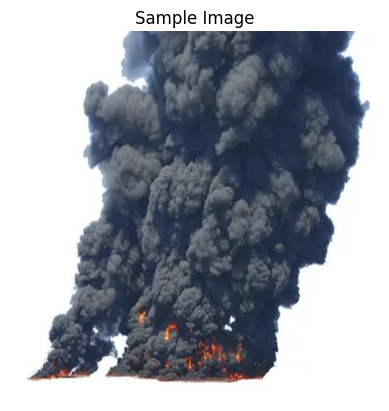

Labels for the image: ['1 0.5125 0.46875 0.92421875 0.93359375\n']


In [ ]:


if image_files:
    first_image_path = os.path.join(train_images_dir, image_files[5])
    first_label_path = os.path.join(train_labels_dir, label_files[5])

    img = cv2.imread(first_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  display
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Sample Image")
    plt.show()

    with open(first_label_path, "r") as f:
        labels = f.readlines()
    print("Labels for the image:", labels)
else:
    print("No image files found in the specified directory.")


In [7]:
!pip install -q PyYAML

import yaml
import os

yamal_file = "/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/data.yaml"

# Get the directory where the YAML file is located
yaml_dir = os.path.dirname(yamal_file)

with open(yamal_file, "r") as f:
    config_data = yaml.safe_load(f)

with open(yamal_file, "w") as f:
    yaml.dump(config_data, f)

In [8]:
!pip install ultralytics

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import yaml
import os

yamal_file = "/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/data.yaml"


yaml_dir = os.path.dirname(yamal_file)



with open(yamal_file, "r") as f:
    config_data = yaml.safe_load(f)


config_data['train'] = '/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/train/images' 
config_data['val'] = '/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/valid/images' 

with open(yamal_file, "w") as f:
    yaml.dump(config_data, f)

In [ ]:

import yaml
import os

yamal_file = "/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/data.yaml"


yaml_dir = os.path.dirname(yamal_file)



with open(yamal_file, "r") as f:
    config_data = yaml.safe_load(f)


config_data['train'] = '/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/train/images' 
config_data['val'] = '/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/valid/images' 

with open(yamal_file, "w") as f:
    yaml.dump(config_data, f)

#train

model = YOLO('yolo11n.pt') 

history = model.train(
    data=yamal_file,
    epochs=10,          
    imgsz=640,          
    cache=True,         
    patience=5,         
    save_period=1       
)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/data.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=1, cache=True, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

train: Scanning /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/train/labels.cache... 35695 images, 9046 backgrounds, 0 corrupt: 100%|██████████| 35695/35695 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2916, len(boxes) = 36668. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
train: 61.3GB RAM required to cache images with 50% safety margin but only 7.6/12.7GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/valid/labels.cache... 4892 images, 855 backgrounds, 0 corrupt: 100%|██████████| 4892/4892 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 291, len(boxes) = 6085. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: 8.3GB RAM required to cache images with 50% safety margin but only 7.4/12.7GB available, not caching images ⚠️
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.47G      1.857      3.121       1.99         20        640: 100%|██████████| 2231/2231 [12:11<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:43<00:00,  3.51it/s]


                   all       4892       6085      0.388      0.312      0.304      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.4G      1.855      2.472      2.014         10        640: 100%|██████████| 2231/2231 [12:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:41<00:00,  3.66it/s]


                   all       4892       6085      0.517      0.359      0.375      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.4G      1.794      2.281      1.948         12        640: 100%|██████████| 2231/2231 [11:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:41<00:00,  3.67it/s]


                   all       4892       6085      0.573      0.372      0.432      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.39G      1.724      2.098      1.882         14        640: 100%|██████████| 2231/2231 [11:33<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:44<00:00,  3.40it/s]


                   all       4892       6085      0.584       0.47      0.504      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.39G      1.651       1.92      1.812         14        640: 100%|██████████| 2231/2231 [11:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:40<00:00,  3.74it/s]


                   all       4892       6085      0.648      0.489      0.554      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.38G      1.592      1.779      1.763         14        640: 100%|██████████| 2231/2231 [11:39<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:44<00:00,  3.47it/s]


                   all       4892       6085      0.668      0.509       0.58      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.4G      1.544       1.65      1.719         17        640: 100%|██████████| 2231/2231 [11:43<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:43<00:00,  3.52it/s]


                   all       4892       6085      0.674      0.545       0.61      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.38G      1.489      1.525       1.67         15        640: 100%|██████████| 2231/2231 [11:47<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:44<00:00,  3.44it/s]


                   all       4892       6085      0.723      0.559      0.642      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.38G      1.428      1.408      1.617         17        640: 100%|██████████| 2231/2231 [11:56<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:41<00:00,  3.70it/s]


                   all       4892       6085      0.708      0.585      0.652      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.37G      1.375       1.31      1.572         17        640: 100%|██████████| 2231/2231 [11:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:43<00:00,  3.55it/s]

                   all       4892       6085       0.74      0.587      0.675      0.387



10 epochs completed in 2.093 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:42<00:00,  3.63it/s]


                   all       4892       6085      0.739      0.587      0.675      0.387
                  fire       3232       4718      0.759      0.671      0.749      0.416
                 smoke       1055       1367      0.719      0.504      0.601      0.359
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
results = model.val()
print(results)


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/valid/labels.cache... 4892 images, 855 backgrounds, 0 corrupt: 100%|██████████| 4892/4892 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 291, len(boxes) = 6085. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: 8.4GB RAM required to cache images with 50% safety margin but only 5.1/12.7GB available, not caching images ⚠️



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 306/306 [00:50<00:00,  6.12it/s]


                   all       4892       6085      0.739      0.587      0.675      0.387
                  fire       3232       4718      0.758       0.67      0.748      0.415
                 smoke       1055       1367       0.72      0.504      0.602      0.359
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dec8b00f070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

In [ ]:
import random

test_images_dir = '/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images'
test_files = os.listdir(test_images_dir)

if test_files:
    random_image = random.choice(test_files)
    test_image = os.path.join(test_images_dir, random_image)
    print("Randomly selected test image:", test_image)
else:
    print("No test images found.")


Randomly selected test image: /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/WhatsApp-Video-2024-01-12-at-18_01_23_mp4-166_jpg.rf.2d07530df091ac16f3a54e8bc82c92fc.jpg


In [ ]:
import os

# مسار مجلد الصور
test_images_dir = '/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images'

# الحصول على أول صورة في المجلد
test_files = os.listdir(test_images_dir)
test_image = os.path.join(test_images_dir, test_files[0])  # أول صورة

print("تم اختيار الصورة للاختبار:", test_image)



image 1/1 /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/WhatsApp-Video-2024-01-12-at-18_01_23_mp4-166_jpg.rf.2d07530df091ac16f3a54e8bc82c92fc.jpg: 640x640 1 fire, 11.3ms
Speed: 2.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train25


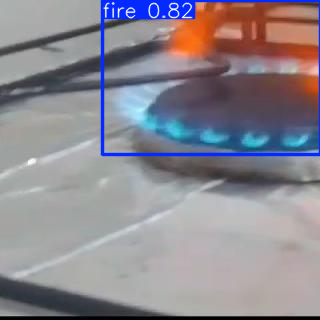

In [ ]:
# التنبؤ بالصورة باستخدام النموذج
results = model.predict(test_image, save=True)

# عرض النتائج
results[0].show()



image 1/1 /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/000026_jpg.rf.09dee8a807a4d4abd72433c891c2a7b6.jpg: 640x640 (no detections), 12.1ms
Speed: 4.0ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


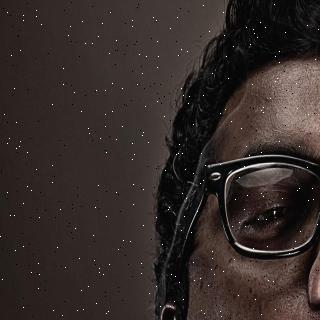

In [ ]:
results = model.predict('/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/000026_jpg.rf.09dee8a807a4d4abd72433c891c2a7b6.jpg')

# Show the first result if there are multiple
results[0].show()  # Display predictions for the first image



image 1/1 /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/HouseTwo853_png.rf.d1b739fb01f35e93c3b839e3fd71832e.jpg: 640x640 1 fire, 12.4ms
Speed: 2.4ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


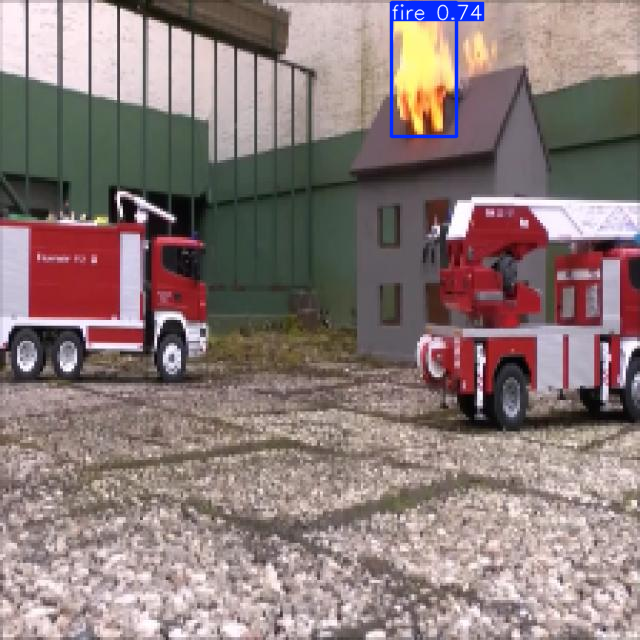

In [ ]:
results = model.predict('/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/HouseTwo853_png.rf.d1b739fb01f35e93c3b839e3fd71832e.jpg')

# Show the first result if there are multiple
results[0].show()  # Display predictions for the first image



image 1/1 /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/-189475_png.rf.b85d47a7ffdbb6a4f1e03160fb8cd426.jpg: 640x640 1 smoke, 42.0ms
Speed: 3.4ms preprocess, 42.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


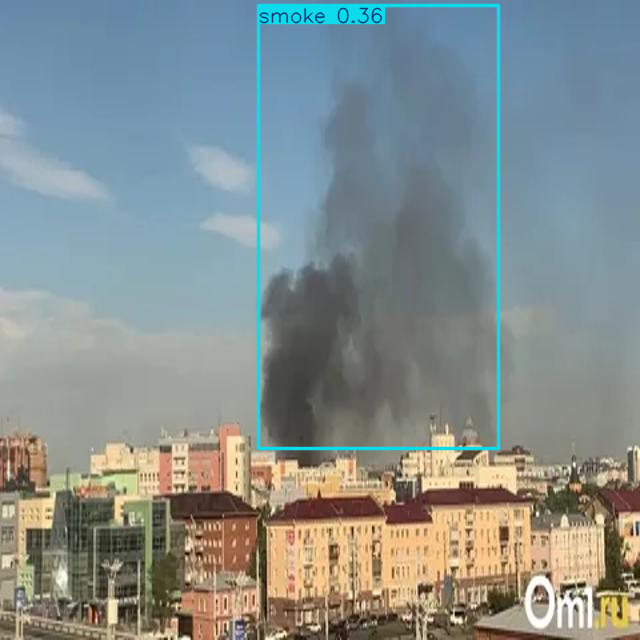

In [ ]:
results = model.predict('/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/test/images/-189475_png.rf.b85d47a7ffdbb6a4f1e03160fb8cd426.jpg')

# Show the first result if there are multiple
results[0].show()  # Display predictions for the first image


In [ ]:

# # Step 6: Resume Training the YOLOv8 Model
model = YOLO('/content/last.pt')  # Load the last checkpoint

history = model.train(
    data=yamal_file,     # Dataset YAML file
    epochs=10,          # Total number of epochs (including previous 20)
    imgsz=640,          # Image size
    cache=True,         # Cache images for faster training
    patience=5,         # Early stopping patience
    save_period=1       # Save checkpoints every epoch
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/last.pt, data=/content/fire-dataset_yolo/Fire-and-Smoke-Dataset/data.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=1, cache=True, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/train/labels.cache... 35695 images, 9046 backgrounds, 0 corrupt: 100%|██████████| 35695/35695 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2916, len(boxes) = 36668. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
train: 61.3GB RAM required to cache images with 50% safety margin but only 2.6/12.7GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/fire-dataset_yolo/Fire-and-Smoke-Dataset/valid/labels.cache... 4892 images, 855 backgrounds, 0 corrupt: 100%|██████████| 4892/4892 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 291, len(boxes) = 6085. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: 8.3GB RAM required to cache images with 50% safety margin but only 2.4/12.7GB available, not caching images ⚠️
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.64G      1.401      1.342      1.595         20        640: 100%|██████████| 2231/2231 [12:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:44<00:00,  3.46it/s]


                   all       4892       6085      0.698      0.538      0.616       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.55G      1.503      1.524      1.675         10        640: 100%|██████████| 2231/2231 [12:28<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:47<00:00,  3.25it/s]


                   all       4892       6085      0.621      0.504      0.557      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.53G      1.535      1.565      1.698         12        640: 100%|██████████| 2231/2231 [12:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:46<00:00,  3.26it/s]


                   all       4892       6085      0.674      0.532        0.6       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.53G       1.51      1.518       1.68         14        640: 100%|██████████| 2231/2231 [12:15<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:46<00:00,  3.27it/s]


                   all       4892       6085      0.665      0.536      0.601      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.52G      1.454      1.414       1.63         14        640: 100%|██████████| 2231/2231 [12:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:45<00:00,  3.34it/s]


                   all       4892       6085      0.707      0.551      0.631      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.51G      1.409      1.323      1.593         14        640: 100%|██████████| 2231/2231 [12:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:46<00:00,  3.26it/s]


                   all       4892       6085      0.768      0.579       0.67      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.54G      1.362      1.241      1.559         17        640: 100%|██████████| 2231/2231 [12:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:44<00:00,  3.47it/s]


                   all       4892       6085      0.735        0.6      0.683        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.52G      1.313      1.162      1.515         15        640: 100%|██████████| 2231/2231 [12:08<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:47<00:00,  3.25it/s]


                   all       4892       6085      0.779      0.591      0.696      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.52G      1.268      1.079      1.474         17        640: 100%|██████████| 2231/2231 [12:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 153/153 [00:45<00:00,  3.34it/s]


                   all       4892       6085      0.761       0.61       0.71      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.51G      1.243      1.046      1.451         15        640:  25%|██▍       | 556/2231 [03:01<08:26,  3.31it/s]

In [ ]:
!pip install zipfile36
import zipfile
folder_to_zip = '/content/runs'  # Replace with your folder path
zip_filename = 'runs.zip'  # Name of the zip file
   with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
       for root, _, files in os.walk(folder_to_zip):
           for file in files:
               file_path = os.path.join(root, file)
               zipf.write(file_path, os.path.relpath(file_path, folder_to_zip))


from google.colab import files
   files.download(zip_filename)

In [ ]:
# Save the model in the current directory
torch.save(model.state_dict(), 'fire_detect_model_yolo11m.pt')

# Or save in a specific folder
save_path = '/content/drive/MyDrive/fire_detect_model_yolo11m.pt'
torch.save(model.state_dict(), save_path)
